In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [2]:
# loading datasets
actives = pd.read_csv('../../mold2_descriptors/2242_actives.csv')
inactives = pd.read_csv('../../mold2_descriptors/2242_inactives.csv')

In [3]:
print('actives:', len(actives))
print('inactives:', len(inactives))

actives: 715
inactives: 183379


In [4]:
# spliting datasets into test - train & validation
actives_test = actives.sample(n=300, random_state=42)
actives_train = actives.drop(actives_test.index)
inactives_test = inactives.sample(n=300, random_state=42)
inactives_train = inactives.drop(inactives_test.index)

# balancing datasets by sampling just 415 inactives for training
inactives_train = inactives_train.sample(n=415, random_state=42)

In [5]:
df = pd.concat([actives_train, inactives_train], ignore_index=True)

In [6]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,0,2,0,2,0,0,0,0,0,0,...,0,1,0,0,0,4.85798,-0.806583,0.000000,2.846540,0
1,0,0,0,1,0,0,0,0,0,0,...,0,2,0,0,0,4.24793,-0.100701,0.000000,0.436691,0
2,0,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,4.39200,-0.521000,0.000000,-0.698000,1
3,2,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,5.32193,-0.682781,0.387097,2.778200,0
4,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,4.90700,-0.787000,0.000000,1.816000,1


In [7]:
X = df.drop(['activity'], axis=1)
y = df['activity']

In [8]:
y.value_counts()

0    415
1    415
Name: activity, dtype: int64

In [9]:
import matplotlib.pyplot as plt

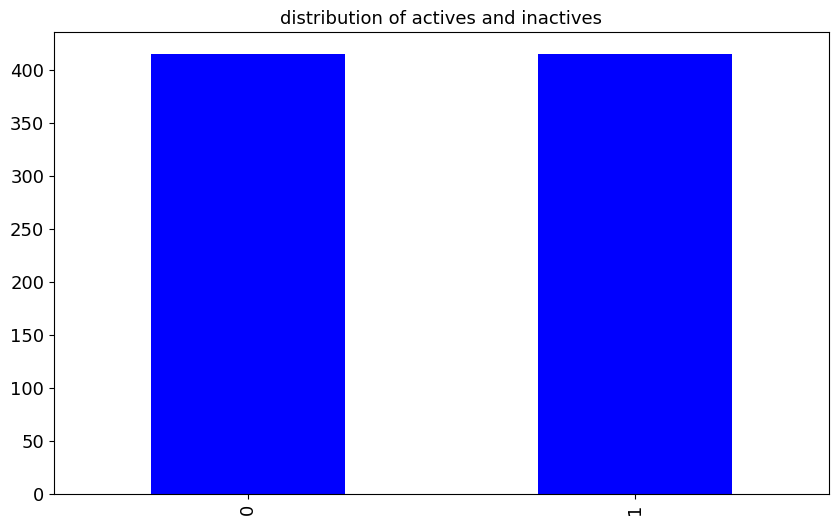

In [10]:
ax = y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='blue')
ax.set_title('distribution of actives and inactives', fontsize=13)
ax.set_alpha(0.5)

In [11]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# normalizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_validate)

## training model with balanced (by undersampling inactives) data

In [13]:
import tensorflow as tf

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=50, batch_size=32)

Epoch 1/50
19/19 [==============================] - 2s 27ms/step - loss: 0.5650 - accuracy: 0.7126 - val_loss: 0.4468 - val_accuracy: 0.7791
Epoch 2/50
19/19 [==============================] - 0s 11ms/step - loss: 0.3874 - accuracy: 0.8296 - val_loss: 0.3771 - val_accuracy: 0.8474
Epoch 3/50
19/19 [==============================] - 0s 11ms/step - loss: 0.3133 - accuracy: 0.8709 - val_loss: 0.3616 - val_accuracy: 0.8474
Epoch 4/50
19/19 [==============================] - 0s 11ms/step - loss: 0.2186 - accuracy: 0.9105 - val_loss: 0.3006 - val_accuracy: 0.8715
Epoch 5/50
19/19 [==============================] - 0s 16ms/step - loss: 0.1664 - accuracy: 0.9329 - val_loss: 0.3002 - val_accuracy: 0.8876
Epoch 6/50
19/19 [==============================] - 0s 13ms/step - loss: 0.1056 - accuracy: 0.9639 - val_loss: 0.3792 - val_accuracy: 0.8715
Epoch 7/50
19/19 [==============================] - 0s 14ms/step - loss: 0.0595 - accuracy: 0.9862 - val_loss: 0.4552 - val_accuracy: 0.8715
Epoch 8/50
19

### evaluating the model using the test data

In [16]:
# getting the test dataset
testing_data = pd.concat([actives_test, inactives_test], ignore_index=True)

In [17]:
len(testing_data)

600

In [18]:
testing_data['activity'].value_counts()

1    300
0    300
Name: activity, dtype: int64

In [19]:
testing_data.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,1,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,4.954,-0.280,0.231,3.149,1
1,1,0,0,2,2,0,0,0,0,0,...,0,1,0,0,1,5.285,-0.234,0.214,0.636,1
2,2,0,0,2,2,0,0,0,0,0,...,0,2,0,0,0,5.170,-0.658,0.444,3.317,1
3,2,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,5.170,-0.823,0.444,3.307,1
4,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,4.858,-0.717,0.000,1.820,1


In [20]:
testing_data_x = testing_data.drop(['activity'], axis=1)
print(len(testing_data_x))
testing_data_x = scaler.transform(testing_data_x)
testing_data_y = testing_data['activity']

600


In [21]:
model.evaluate(testing_data_x, testing_data_y, verbose=2)

19/19 - 0s - loss: 1.4680 - accuracy: 0.8217 - 104ms/epoch - 5ms/step


[1.4680019617080688, 0.8216666579246521]

### evaluating model's performance with F1 score, precision, recall, etc

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [23]:
inactives_test_x = inactives_test.drop(['activity'], axis=1)
inactives_test_x = scaler.transform(inactives_test_x)
actives_test_x = actives_test.drop(['activity'], axis=1)
actives_test_x = scaler.transform(actives_test_x)

In [24]:
y_true_actives = np.array([1] * len(actives_test_x))
y_true_inactives = np.array([0] * len(inactives_test_x))
y_true = np.concatenate((y_true_actives, y_true_inactives))

There are both y_pred and y_pred_rounded because the model outputs a probability and we need to round it to get the class.


y_pred will be used to calculate the ROC curve and the AUC.


y_pred_rounded will be used to calculate the confusion matrix.

In [25]:
y_pred_actives = model.predict(actives_test_x)
y_pred_actives_rounded = (y_pred_actives > 0.5).astype(int).reshape(len(y_pred_actives, ))
y_pred_inactives = model.predict(inactives_test_x)
y_pred_inactives_rounded = (y_pred_inactives > 0.5).astype(int).reshape(len(y_pred_inactives, ))
y_pred = np.concatenate((y_pred_actives, y_pred_inactives))
y_pred_rounded = np.concatenate((y_pred_actives_rounded, y_pred_inactives_rounded))

10/10 [==============================] - 0s 3ms/step


In [29]:
accuracy = accuracy_score(y_true, y_pred_rounded)
precision = precision_score(y_true, y_pred_rounded)
recall = recall_score(y_true, y_pred_rounded)
f1 = f1_score(y_true, y_pred_rounded)
mcc = matthews_corrcoef(y_true, y_pred_rounded)

In [30]:
print("accuracy is {}".format(accuracy))
print("precision is {}".format(precision))
print("recall is {}".format(recall))
print("f1 is {}".format(f1))
print("mcc is {}".format(mcc))

accuracy is 0.8216666666666667
precision is 0.8293515358361775
recall is 0.81
f1 is 0.8195615514333896
mcc is 0.6435085345066888


Drawing the ROC curve to enable us to carry out threshold moving,

In [31]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)

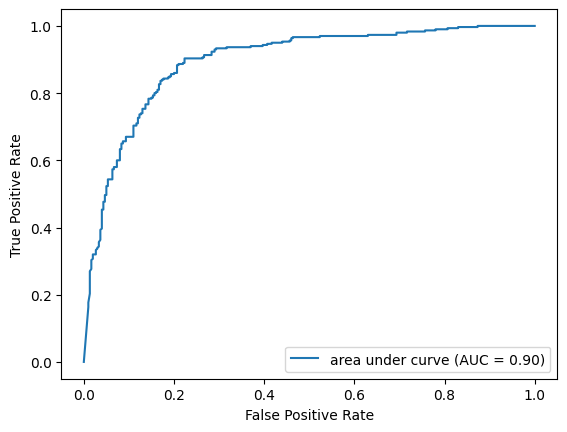

In [32]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='area under curve')
display.plot()
plt.show()

In [37]:
fav_thresholds = []
for i in range(len(thresholds)):
    if fpr[i] < 0.25 and tpr[i] > 0.8:
        fav_thresholds.append((i, thresholds[i], fpr[i], tpr[i]))

In [38]:
for i in fav_thresholds:
    print(i)

(72, 0.707669, 0.16, 0.8033333333333333)
(73, 0.7074779, 0.16333333333333333, 0.8033333333333333)
(74, 0.555333, 0.16333333333333333, 0.81)
(75, 0.50515985, 0.16666666666666666, 0.81)
(76, 0.36007676, 0.16666666666666666, 0.8266666666666667)
(77, 0.35716262, 0.17, 0.8266666666666667)
(78, 0.2913963, 0.17, 0.8366666666666667)
(79, 0.25839174, 0.17333333333333334, 0.8366666666666667)
(80, 0.23018324, 0.17333333333333334, 0.84)
(81, 0.20684548, 0.17666666666666667, 0.84)
(82, 0.1846669, 0.17666666666666667, 0.8433333333333334)
(83, 0.10592192, 0.18666666666666668, 0.8433333333333334)
(84, 0.10388503, 0.18666666666666668, 0.8466666666666667)
(85, 0.09747016, 0.19, 0.8466666666666667)
(86, 0.083393715, 0.19, 0.85)
(87, 0.07646848, 0.19333333333333333, 0.85)
(88, 0.06783055, 0.19333333333333333, 0.8566666666666667)
(89, 0.058605283, 0.2, 0.8566666666666667)
(90, 0.054465413, 0.2, 0.86)
(91, 0.045495052, 0.20666666666666667, 0.86)
(92, 0.022110408, 0.20666666666666667, 0.8833333333333333)
(93

In [39]:
selected_threshold = fav_thresholds[-1][1]
selected_threshold

0.008498849

In [40]:
y_pred_actives_rounded2 = (y_pred_actives > selected_threshold).astype(int).reshape(len(y_pred_actives, ))
y_pred_inactives_rounded2 = (y_pred_inactives > selected_threshold).astype(int).reshape(len(y_pred_inactives, ))
y_pred_rounded2 = np.concatenate((y_pred_actives_rounded2, y_pred_inactives_rounded2))

In [43]:
accuracy = accuracy_score(y_true, y_pred_rounded2)
precision = precision_score(y_true, y_pred_rounded2)
recall = recall_score(y_true, y_pred_rounded2)
f1 = f1_score(y_true, y_pred_rounded2)
mcc = matthews_corrcoef(y_true, y_pred_rounded2)

In [44]:
print("accuracy is {}".format(accuracy))
print("precision is {}".format(precision))
print("recall is {}".format(recall))
print("f1 is {}".format(f1))
print("mcc is {}".format(mcc))

accuracy is 0.8383333333333334
precision is 0.8011869436201781
recall is 0.9
f1 is 0.847723704866562
mcc is 0.6818725590088284
